In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import os

In [2]:
accident_df_2019 = pd.read_csv('Accident_Data_2019_dropna.csv')
accident_df_2020 = pd.read_csv('Accident_Data_2020_dropna.csv')
#accident_df_2020.head()

In [3]:
# Create df that has states and their respective divisions
d = {'State':['WA','OR','CA',
               'MT','ID','NV','WY','UT','CO','AZ','NM',
               'ND','SD','NE','KS','MN','IA','MO',
               'TX','OK','AR','LA',
               'WI','IL','MI','IN','OH',
               'KY','TN','MS','AL',
               'ME','VT','NH','MA','CT','RI',
               'NY','NJ','PA',
               'WV','DE','MD','VA','NC','SC','GA','FL'],
    'Division':['Pacific','Pacific','Pacific',
                'Mountain','Mountain','Mountain','Mountain','Mountain','Mountain','Mountain','Mountain',
                'West North Central','West North Central','West North Central','West North Central','West North Central','West North Central','West North Central',
                'West South Central','West South Central','West South Central','West South Central',
                'East North Central','East North Central','East North Central','East North Central','East North Central',
                'East South Central','East South Central','East South Central','East South Central',
                'New England','New England','New England','New England','New England','New England',
                'Middle Atlantic','Middle Atlantic','Middle Atlantic',
                'South Atlantic','South Atlantic','South Atlantic','South Atlantic','South Atlantic','South Atlantic','South Atlantic','South Atlantic']}
all_div_df = pd.DataFrame(data=d)
all_div_df.head()
# Add divisions column to original df
accident_df_2019_w_divisions = pd.merge(accident_df_2019,all_div_df,on='State')
#accident_df_2019_w_divisions.head()
accident_df_2020_w_divisions = pd.merge(accident_df_2020,all_div_df,on='State')
#accident_df_2020_w_divisions.head()

In [4]:
sum_sev_by_div_df_2019 = pd.DataFrame(accident_df_2019_w_divisions.groupby('Division')['Severity'].sum().rename('Sum_of_Severity_Scores').reset_index())
sum_sev_by_div_df_2020 = pd.DataFrame(accident_df_2019_w_divisions.groupby('Division')['Severity'].sum().rename('Sum_of_Severity_Scores').reset_index())


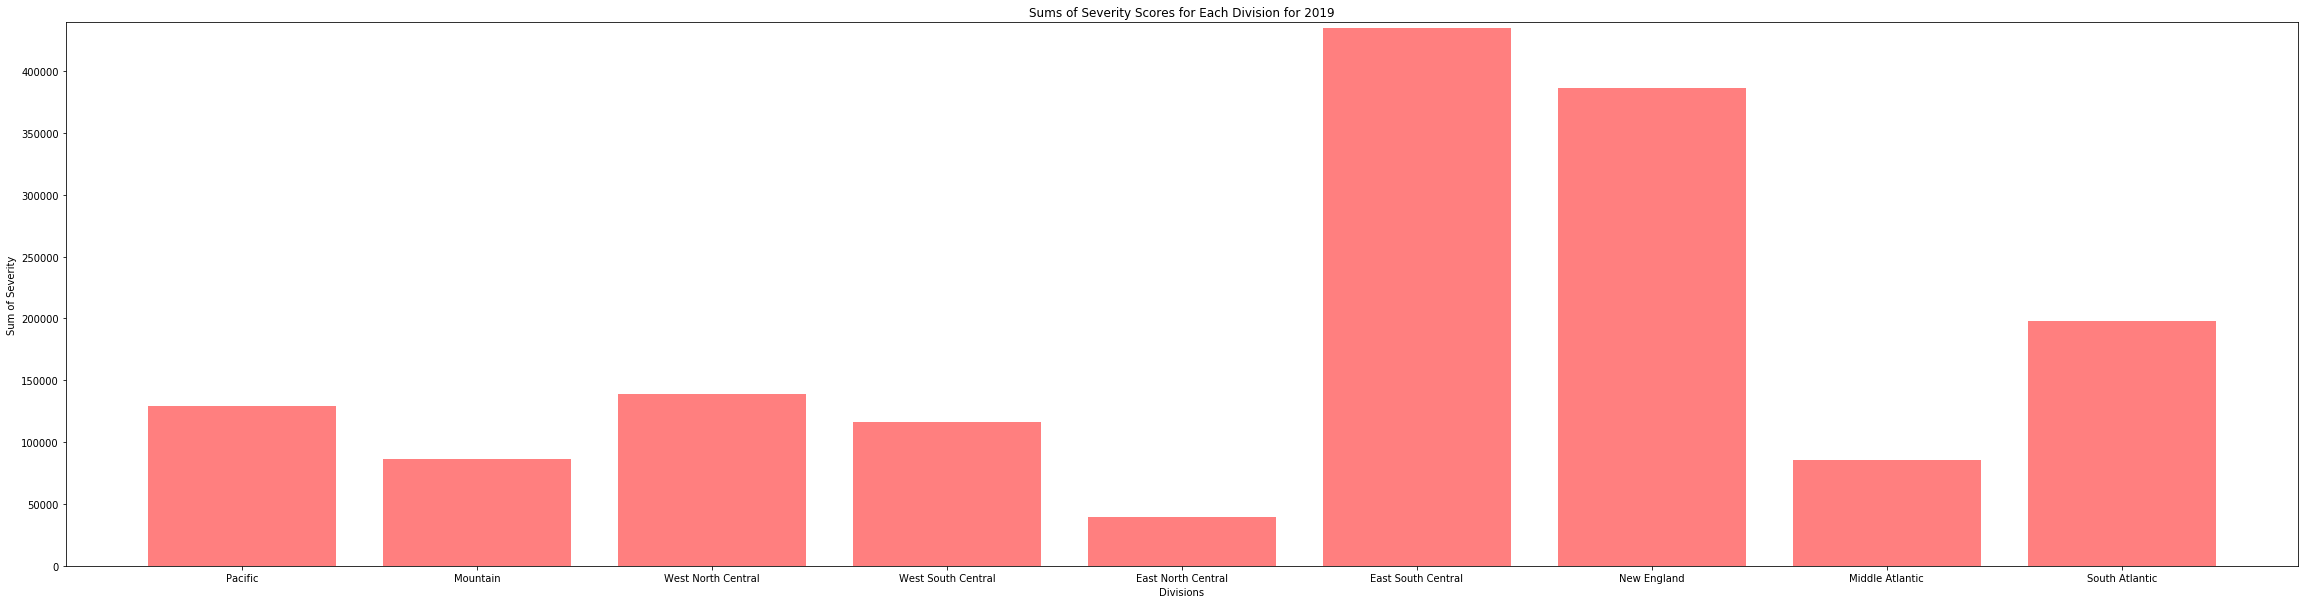

In [8]:
# Create bar chart for 2019
sev_sum = sum_sev_by_div_df_2019['Sum_of_Severity_Scores']
x_axis = np.arange(len(sev_sum))
plt.figure(figsize=(40, 10))
plt.bar(x_axis, sev_sum, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Pacific", "Mountain", "West North Central", "West South Central", "East North Central", "East South Central", 'New England', 'Middle Atlantic', 'South Atlantic'])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(sev_sum)+5000)
plt.title("Sums of Severity Scores for Each Division for 2019")
plt.xlabel("Divisions")
plt.ylabel("Sum of Severity")

# Save image
plt.savefig('Images/Sums of Severity Scores for Each Division for 2019.png')
plt.show()

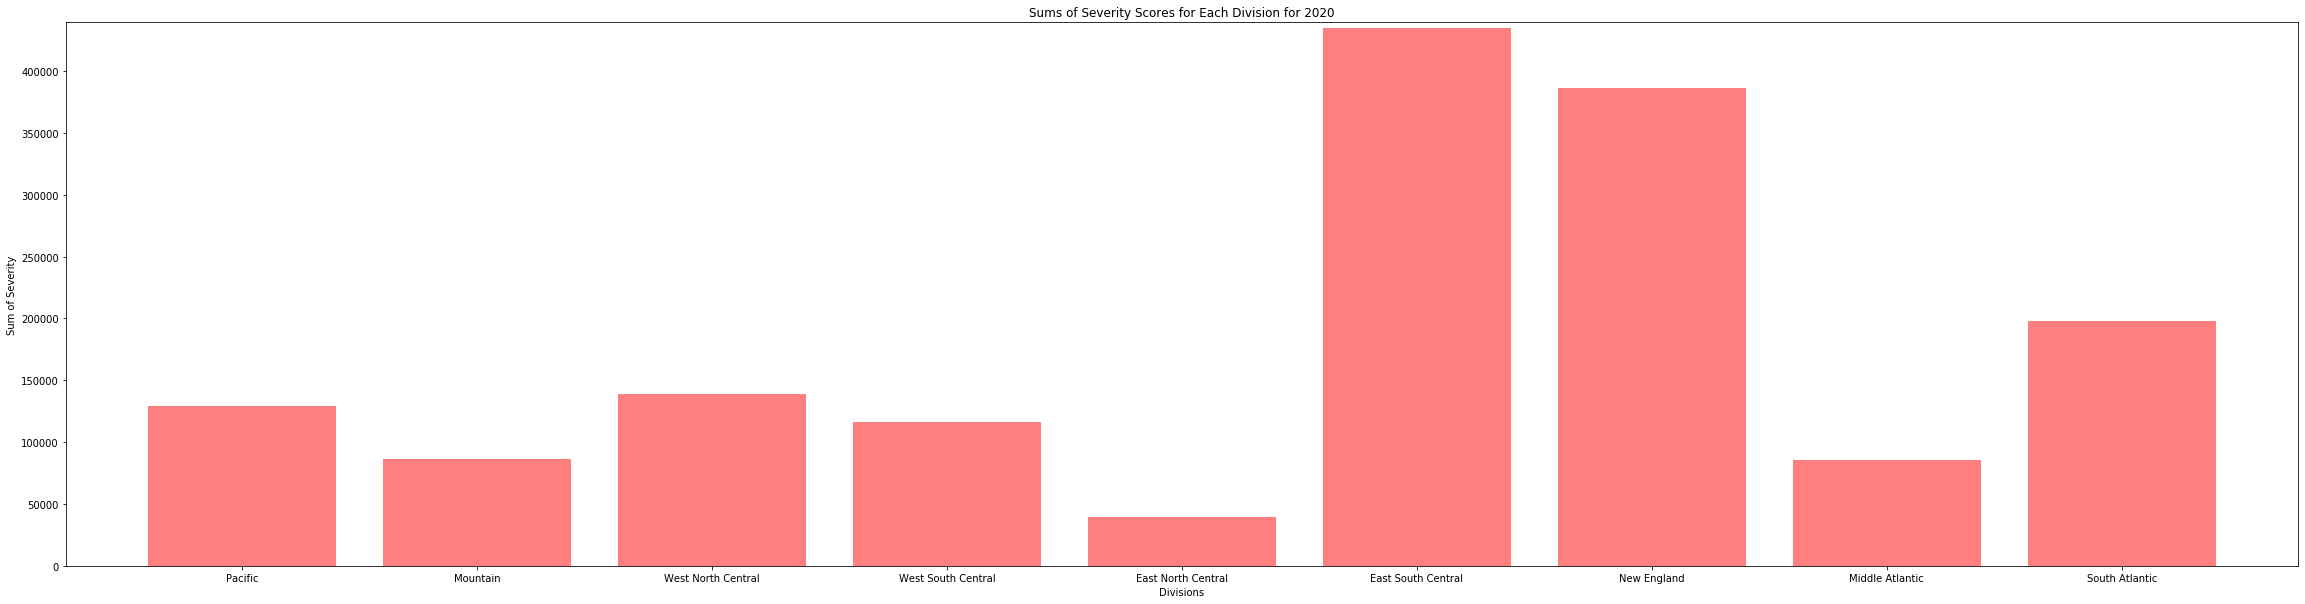

In [6]:
# Create bar chart for 2020
sev_sum = sum_sev_by_div_df_2020['Sum_of_Severity_Scores']
x_axis = np.arange(len(sev_sum))
plt.figure(figsize=(40, 10))
plt.bar(x_axis, sev_sum, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Pacific", "Mountain", "West North Central", "West South Central", "East North Central", "East South Central", 'New England', 'Middle Atlantic', 'South Atlantic'])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(sev_sum)+5000)
plt.title("Sums of Severity Scores for Each Division for 2020")
plt.xlabel("Divisions")
plt.ylabel("Sum of Severity")

# Save image
plt.savefig('Images/Sums of Severity Scores for Each Division for 2020.png')
plt.show()

In [12]:
Count_of_Severity_Score_2019 = pd.DataFrame(accident_df_2019_w_divisions.groupby('Division')['Severity'].value_counts().rename('Count_of_Severity_Score').reset_index())
Count_of_Severity_Score_2020 = pd.DataFrame(accident_df_2019_w_divisions.groupby('Division')['Severity'].value_counts().rename('Count_of_Severity_Score').reset_index())

In [14]:
sev_count_one = Count_of_Severity_Score_2019['Count_of_Severity_Score'][1]
sev_count_two = Count_of_Severity_Score_2019['Count_of_Severity_Score'][2]
sev_count_three = Count_of_Severity_Score_2019['Count_of_Severity_Score'][3]
sev_count_four = Count_of_Severity_Score_2019['Count_of_Severity_Score'][4]
x_axis = np.arange(len(sev_count_one))
plt.figure(figsize=(40, 10))
ax = plt.subplot()
ax.bar(x_axis, sev_count_one, width=0.5, color='b', align='center')
ax.bar(x_axis, sev_count_two, width=0.5, color='g', align='center')
ax.bar(x_axis, sev_count_three, width=0.5, color='r', align='center')
ax.bar(x_axis, sev_count_four, width=0.5, color='p', align='center')


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Pacific", "Mountain", "West North Central", "West South Central", "East North Central", "East South Central", 'New England', 'Middle Atlantic', 'South Atlantic'])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(sev_sum)+5000)
plt.title("Count of Severity Score 2019")
plt.xlabel("Divisions")
plt.ylabel("Count of Each Severity Score")

# Save image
plt.savefig('Count_of_Severity_Score_2019.png')
plt.show()

TypeError: object of type 'numpy.int64' has no len()